In [2]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

In [3]:
def last_index_leq(a, x):
    t = np.where(a<=x)[0]
    if len(t) == 0:
        return 0
    else:
        return t[-1]

def visualize_convolution(x, f, g):
    assert len(x) == len(f) == len(g)
    t = scipy.linalg.toeplitz(np.concatenate([g, np.zeros(len(x) - 1)]), np.zeros(len(x)))
    mult_values = t * f[None,:]
    conv_values = mult_values.sum(1) * (x[1] - x[0])
    xmin, xmax = np.min(x), np.max(x)
    newx = np.linspace(2 * xmin, 2 * xmax, 2 * len(x) - 1)
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_ylim(np.min(mult_values)-0.5, np.max(mult_values)+1)
    ax.set_xlim(2 * xmin - (xmax - xmin), 2 * xmax + 1)
    ax.plot(x, f, label="$f$")
    shifted, = ax.plot(x, g, label="$g$")
    mult, = ax.plot(x, mult_values[0], label=r"$f(\tau)g(t - \tau)$")
    conv, = ax.plot(newx, conv_values, label=r"$f\ast g$")
    legend = ax.legend()
    
    lines = [f, shifted, mult, conv]
    lined = {}
    for legline, origline in zip(legend.get_lines(), lines):
        legline.set_picker(True)
        lined[legline] = origline
    
    def update(t):
        i = last_index_leq(x, t)
        j = last_index_leq(newx, t)
        shifted.set_xdata(t - x)
        mult.set_data(x, mult_values[j])
        conv.set_data(newx[:j], conv_values[:j])
        fig.canvas.draw()
    
    def on_pick(event):
        legline = event.artist
        origline = lined[legline]
        visible = not origline.get_visible()
        origline.set_visible(visible)
        legline.set_alpha(1.0 if visible else 0.2)
        fig.canvas.draw()
    fig.canvas.mpl_connect("pick_event", on_pick)
    
    
    interact(update, t=widgets.FloatSlider(min=2*xmin, max=2*xmax, step=0.1, value=2*xmin))
    

In [4]:
l = 50
x = np.linspace(-0.5, 2, 2*l+l//2+1)
f = np.zeros(len(x))
f[l//2:l+l//2+1] = 2
g = np.zeros(len(x))
g[l//2:l] = 3*np.sin(x[l//2:l]*np.pi) ** 2
g[l:2*l+1] = 3

<IPython.core.display.Javascript object>


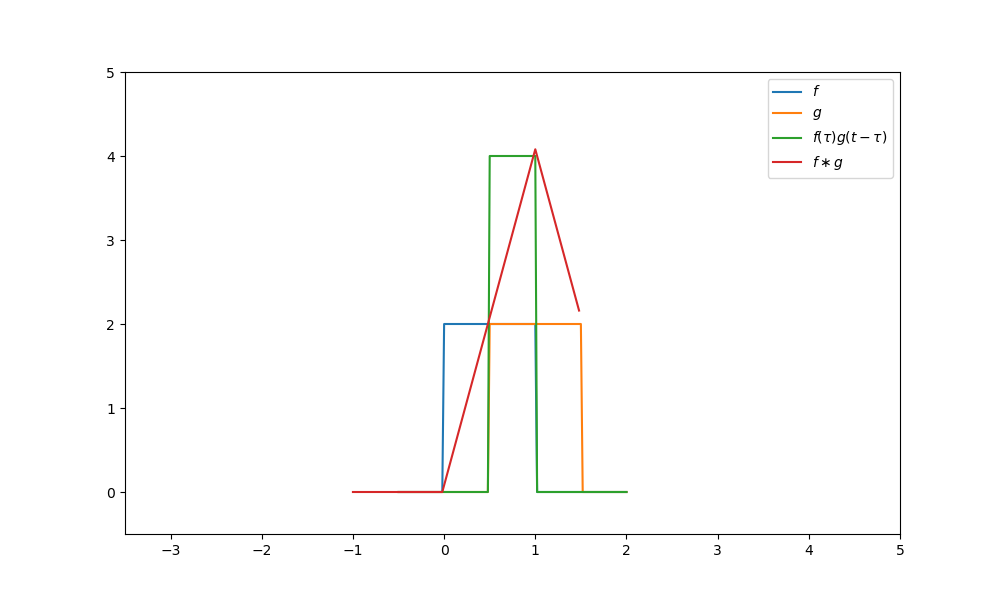

interactive(children=(FloatSlider(value=-1.0, description='t', max=4.0, min=-1.0), Output()), _dom_classes=('w…

In [5]:
visualize_convolution(x, f, f)

<IPython.core.display.Javascript object>


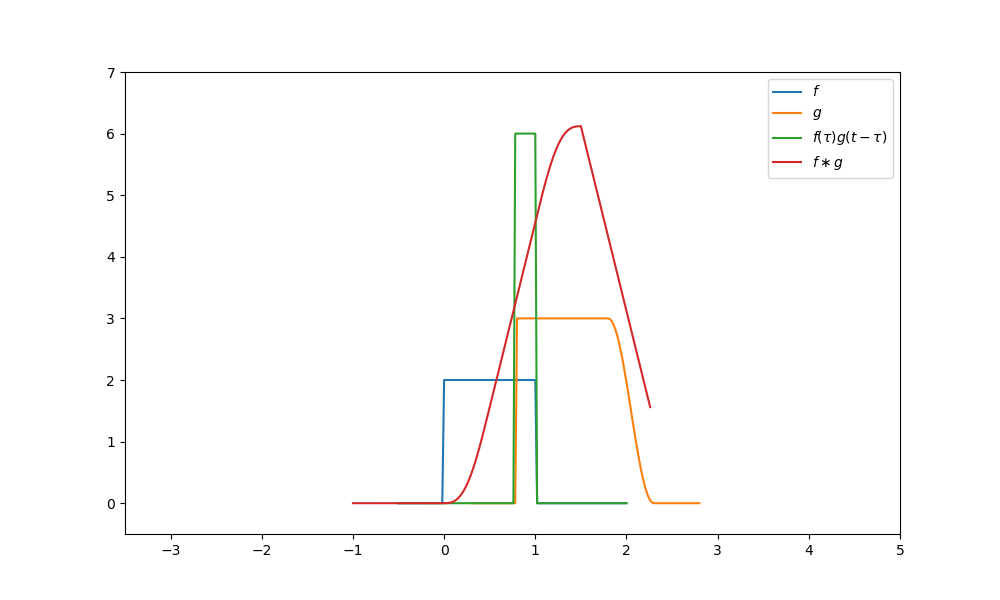

interactive(children=(FloatSlider(value=-1.0, description='t', max=4.0, min=-1.0), Output()), _dom_classes=('w…

In [6]:
visualize_convolution(x, f, g)